In [ ]:
import cv2
import numpy as np
from pprint import pprint
from utils.transfrom import TransformUtils, TransType
from scipy.linalg import hadamard

trans_utils = TransformUtils()
hw3_1_matrix = np.array([[0, 1, 1, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 1, 1, 0]])
hw1_matrix_float = np.float32(hw3_1_matrix)

In [ ]:
dft_matrix = trans_utils.getMatrix(type=TransType.DFT, size=4)
dct_matrix = trans_utils.getMatrix(type=TransType.DCT, size=4)
hadamard_matrix = trans_utils.getMatrix(type=TransType.HADAMARD, size=4)
haar_matrix = trans_utils.getMatrix(type=TransType.HAAR, size=4)

In [8]:
my_dft_matrix = np.dot(np.dot(dft_matrix, hw3_1_matrix), dft_matrix)
np_dft_matrix = cv2.dft(hw1_matrix_float, flags=cv2.DFT_COMPLEX_OUTPUT)

# 对比自己实现的DFT和OpenCV的DFT
# 将小数点限制为3位
my_dft_matrix_rounded = np.round(my_dft_matrix, 3)
np_dft_matrix_rounded = np.round(np_dft_matrix, 3)

print('my_dft_matrix (rounded):')
pprint(my_dft_matrix_rounded)
print('np_dft_matrix (rounded):')
pprint(np_dft_matrix_rounded)

my_dft_matrix (rounded):
array([[ 8.+0.j, -4.-4.j,  0.+0.j, -4.+4.j],
       [-0.-0.j, -0.+0.j,  0.-0.j,  0.+0.j],
       [ 0.-0.j, -0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.-0.j, -0.+0.j,  0.+0.j,  0.+0.j]])
np_dft_matrix (rounded):
array([[[ 8.,  0.],
        [-4., -4.],
        [ 0.,  0.],
        [-4.,  4.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0., -0.]]], dtype=float32)


In [9]:
my_dct_matrix = np.dot(np.dot(dct_matrix, hw3_1_matrix), dct_matrix.T)
np_dct_matrix = cv2.dct(hw1_matrix_float)

# 对比自己实现的DCT和OpenCV的DCT
# 将小数点限制为3位
my_dct_matrix_rounded = np.round(my_dct_matrix, 3)
np_dct_matrix_rounded = np.round(np_dct_matrix, 3)

print('my_dct_matrix (rounded):')
pprint(my_dct_matrix_rounded)
print('np_dct_matrix (rounded):')
pprint(np_dct_matrix_rounded)

my_dct_matrix (rounded):
array([[ 2.,  0., -2., -0.],
       [ 0.,  0., -0., -0.],
       [-0., -0.,  0.,  0.],
       [-0., -0.,  0.,  0.]])
np_dct_matrix (rounded):
array([[ 2.,  0., -2.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]], dtype=float32)


In [11]:
my_hadamard_matrix = np.dot(np.dot(hadamard_matrix, hw3_1_matrix), hadamard_matrix)

pprint(my_hadamard_matrix)

array([[ 8,  0,  0, -8],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])


In [10]:
my_haar_matrix = np.dot(np.dot(haar_matrix, hw3_1_matrix), haar_matrix)

pprint(my_haar_matrix)

array([[ 2.41421356, -0.41421356, -1.        , -1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])


In [ ]:
img = cv2.imread("../pics/Lena.bmp", cv2.IMREAD_GRAYSCALE)

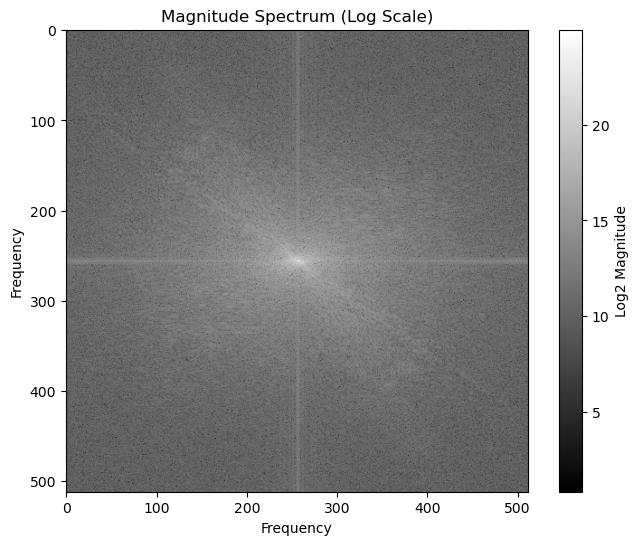

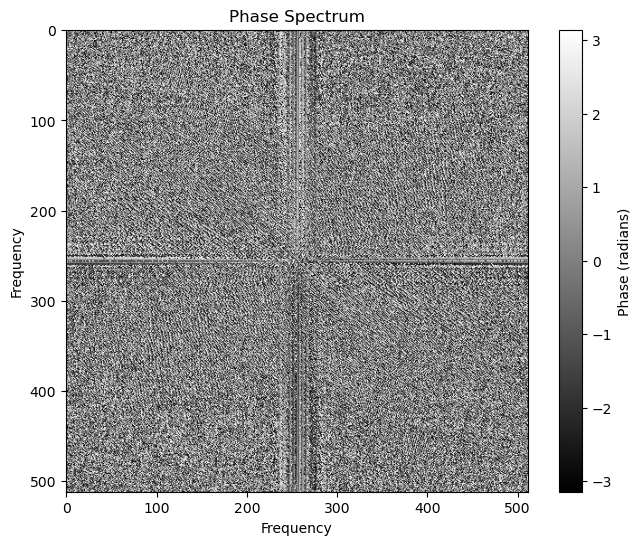

In [12]:
h,w = img.shape
dft_matrix_h = trans_utils.getMatrix(type=TransType.DFT, size=h)
dft_matrix_w  = trans_utils.getMatrix(type=TransType.DFT, size=w)
img_dft = np.dot(
    np.dot(dft_matrix_h, img),
    dft_matrix_w
)
trans_utils.plotSpectrum(matrix=img_dft)

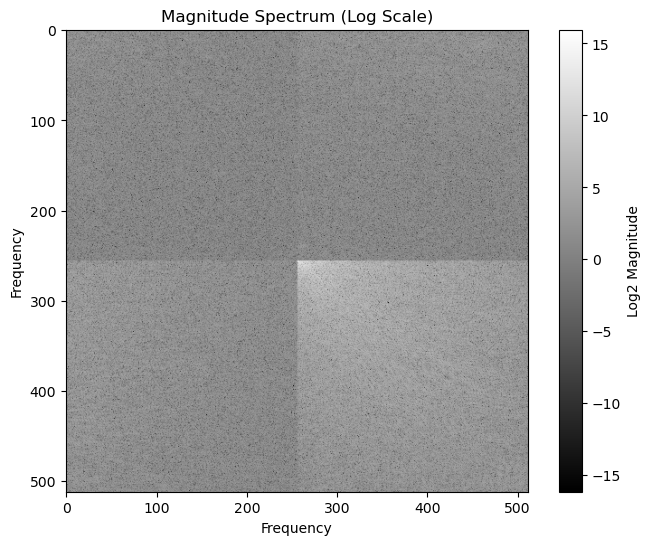

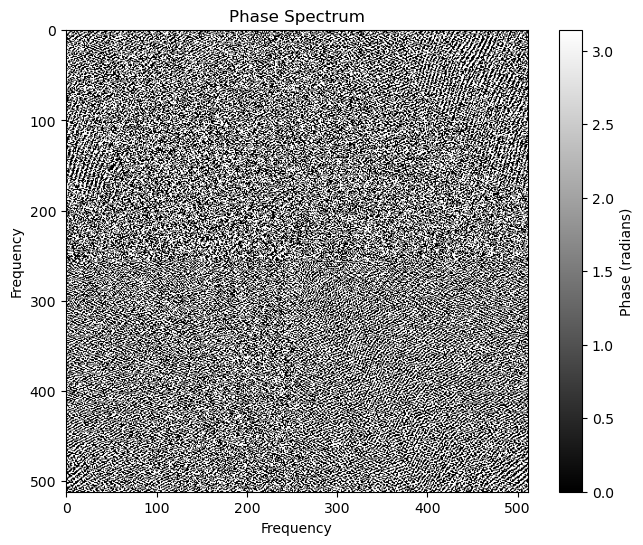

In [13]:
dct_matrix_h = trans_utils.getMatrix(type=TransType.DCT, size=h)
dct_matrix_w = trans_utils.getMatrix(type=TransType.DCT, size=w)
img_dct = np.dot(np.dot(dct_matrix_h, img), dct_matrix_w.T)

trans_utils.plotSpectrum(matrix=img_dct)

In [7]:
# 限制小数点位数
pprint(np.round(dft_matrix, 2))
pprint(np.round(dct_matrix, 2))
pprint(np.round(hadamard_matrix, 2))
pprint(np.round(haar_matrix, 2))

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  0.-1.j, -1.-0.j, -0.+1.j],
       [ 1.+0.j, -1.-0.j,  1.+0.j, -1.-0.j],
       [ 1.+0.j, -0.+1.j, -1.-0.j,  0.-1.j]])
array([[ 0.5 ,  0.5 ,  0.5 ,  0.5 ],
       [ 0.65,  0.27, -0.27, -0.65],
       [ 0.5 , -0.5 , -0.5 ,  0.5 ],
       [ 0.27, -0.65,  0.65, -0.27]])
array([[ 1,  1,  1,  1],
       [ 1, -1,  1, -1],
       [ 1,  1, -1, -1],
       [ 1, -1, -1,  1]])
array([[ 0.5 ,  0.5 ,  0.5 ,  0.5 ],
       [ 0.5 ,  0.5 , -0.5 , -0.5 ],
       [ 0.71, -0.71,  0.  , -0.  ],
       [ 0.  , -0.  ,  0.71, -0.71]])
